In [ ]:

# import modulo os e installazione di rtree e altro per far funzionare l'sjoin
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig

In [ ]:

import pandas as pd
!pip install geopandas
import geopandas
!pip install contextily
import contextily as ctx
import matplotlib.pyplot as plt

In [22]:
rep = geopandas.read_file('/content/drive/MyDrive/Redditi_e_principali_variabili_IRPEF_su_base_comunale_CSV_2020.zip')
regioniGeo = geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/Reg01012021_g")
provinceGeo = geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/ProvCM01012021_g")
comuniGeo = geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/Com01012021_g")

# 1. l'ammontare del reddito da lavoro dipendente (colonna L del dataset) per ogni regione e relativo grafico a torta

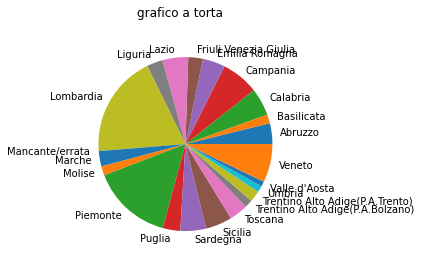

In [3]:
ammontarereddito = rep.groupby("Regione",as_index = False)["Reddito da lavoro dipendente e assimilati - Ammontare in euro"].count()


fig = plt.figure()
ax = plt.axes()
ax.pie(ammontarereddito["Reddito da lavoro dipendente e assimilati - Ammontare in euro"],labels = ammontarereddito["Regione"])

fig.suptitle("grafico a torta")

plt.show()

# 2 l'ammontare del reddito da lavoro dipendente per ogni provincia e relativo grafico a barre verticali


No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

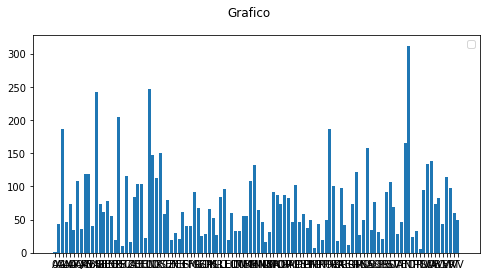

In [4]:
ammontarereddito = rep.groupby("Sigla Provincia",as_index = False)["Reddito da lavoro dipendente e assimilati - Ammontare in euro"].count()


fig = plt.figure(figsize=(8,4))
ax = plt.axes()
ax.bar(ammontarereddito['Sigla Provincia'],ammontarereddito['Reddito da lavoro dipendente e assimilati - Ammontare in euro'])
ax.legend()
plt.suptitle("Grafico")
plt.show

#3. la prime 10 province più ricche



In [5]:
ammontarereddito = rep.groupby("Sigla Provincia",as_index = False)["Reddito da lavoro dipendente e assimilati - Ammontare in euro"].sum()
ammontarereddito.sort_values(by=["Reddito da lavoro dipendente e assimilati - Ammontare in euro"]).head(10)

,Sigla Provincia,Reddito da lavoro dipendente e assimilati - Ammontare in euro
37,FR,1011221105626803941195176051347143091842260038...
83,SA,1050675911069554828771479268235434840512250181...
34,FG,1058218827847644697626590811213120995211298290...
8,AT,1094223930684621273848371568803475788582539634...
38,GE,1109627021937216918622436417195391006560941272...
62,PA,1129181062821853876076471530784977099122297302...
17,BS,1136975964532944151553161965104331884691833191...
49,LU,1143311793090269476728331504074562099812401566...
100,VA,1153303451166394319925257932518432440024769733...
10,BA,1226841981014541665699129539115864822008171141...


#4. la provincia più ricca


In [6]:
ammontarereddito.sort_values(by=["Reddito da lavoro dipendente e assimilati - Ammontare in euro"]).head(1)


,Sigla Provincia,Reddito da lavoro dipendente e assimilati - Ammontare in euro
37,FR,1011221105626803941195176051347143091842260038...


#5. il reddito medio per ogni regione. Ordinare in ordine decrescente a partire dalla regione con il reddito medio più alto

In [13]:
ammontareMedia = rep.groupby("Regione", as_index = False)["Reddito da lavoro dipendente e assimilati - Ammontare in euro"].count() #dovrebbe essere .mean ma non va
ammontareMedia.sort_values(by = "Reddito da lavoro dipendente e assimilati - Ammontare in euro", ascending = False, inplace = True)
ammontareMedia

,Regione,Reddito da lavoro dipendente e assimilati - Ammontare in euro
8,Lombardia,1506
12,Piemonte,1181
21,Veneto,563
3,Campania,550
2,Calabria,404
15,Sicilia,390
6,Lazio,378
14,Sardegna,377
4,Emilia Romagna,330
0,Abruzzo,305


#6. dato il nome di una regione, inserito dall'utente, avere l'elenco delle province della regione con il reddito complessivo e il reddito medio



In [14]:
regione = str(input("Inserisci regione: "))

listaProv = rep[rep["Regione"] == regione]

SumLista = listaProv.groupby("Sigla Provincia", as_index = False)["Reddito da lavoro dipendente e assimilati - Ammontare in euro"].count() #sarebbe il .sum
MeanLista = listaProv.groupby("Sigla Provincia", as_index = False)["Reddito da lavoro dipendente e assimilati - Ammontare in euro"].count() #sarebbe il .mean

SumLista["Media"] = MeanLista["Reddito da lavoro dipendente e assimilati - Ammontare in euro"]
SumLista

Inserisci regione: Lombardia


,Sigla Provincia,Reddito da lavoro dipendente e assimilati - Ammontare in euro,Media
0,BG,243,243
1,BS,205,205
2,CO,148,148
3,CR,113,113
4,LC,84,84
5,LO,60,60
6,MB,55,55
7,MI,133,133
8,MN,64,64
9,PV,186,186


#7. dato il nome di una provincia, inserito dall'utente, avere l'elenco dei comuni della provincia con il reddito. Ordinare in ordine crescente sul reddito.


In [18]:
provincia = str(input("Inserisci sigla provincia: "))

listaCom = rep[rep["Sigla Provincia"] == provincia]
listaCom = listaCom.groupby("Denominazione Comune", as_index = False)["Reddito da lavoro dipendente e assimilati - Ammontare in euro"].count() #sarebbe .sum o .mean
listaCom.sort_values(by = "Reddito da lavoro dipendente e assimilati - Ammontare in euro", ascending = False, inplace = True)
listaCom

Inserisci provincia: MI


,Denominazione Comune,Reddito da lavoro dipendente e assimilati - Ammontare in euro
0,ABBIATEGRASSO,1
84,PARABIAGO,1
98,ROBECCO SUL NAVIGLIO,1
97,ROBECCHETTO CON INDUNO,1
96,RHO,1
...,...,...
39,CISLIANO,1
38,CINISELLO BALSAMO,1
37,CESATE,1
36,CESANO BOSCONE,1


#8. trovare la regione a cui appartiene il comune con il reddito più basso: visualizzare la mappa del comune e della regione


In [20]:
comuneBasso = rep[rep["Reddito da lavoro dipendente e assimilati - Ammontare in euro"] == rep["Reddito da lavoro dipendente e assimilati - Ammontare in euro"].min()][["Regione", "Denominazione Comune"]]
comuneBasso

,Regione,Denominazione Comune
3258,Valle d'Aosta,HONE


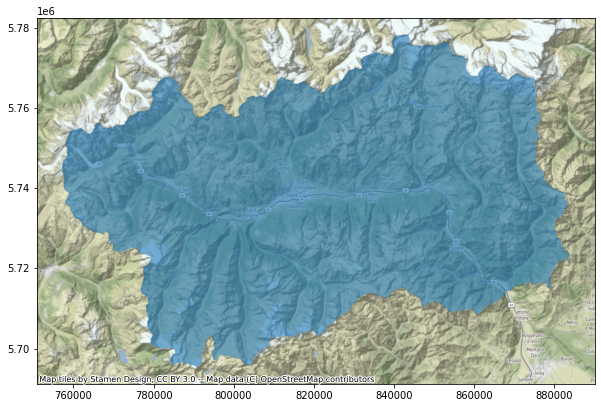

In [27]:
regBassa = comuneBasso["Regione"].values[0]
comBasso = comuneBasso["Denominazione Comune"].values[0].title()

comuneBassoGeometry = comuniGeo[comuniGeo["COMUNE"] == comBasso] #nessun comune in comuniGeo risponde al nome di Hone
regioneBassa = regioniGeo[regioniGeo["DEN_REG"] == regBassa]

ax = regioneBassa.to_crs(epsg=3857).plot(figsize = (10,10), alpha = 0.6)
ctx.add_basemap(ax)

#9. trovare la provincia a cui appartiene il comune con il reddito più basso: visualizzare la mappa del comune e della regione


In [28]:
prov_comuneBasso = rep[rep["Reddito da lavoro dipendente e assimilati - Ammontare in euro"] == rep["Reddito da lavoro dipendente e assimilati - Ammontare in euro"].min()][["Sigla Provincia", "Denominazione Comune"]]
prov_comuneBasso

,Sigla Provincia,Denominazione Comune
3258,AO,HONE
